# Anggota Kelompok


*   Serly Setyani
*   Alifia Shafira
*   Laura Imanuela Mustamu

# Formulasi Masalah
Masalah yang ingin diselesaikan adalah untuk memprediksi apakah pelanggan tertarik atau tidak tertarik untuk membeli kendaraan baru berdasarkan dataset yang telah diberikan menggunakan algoritma klasifikasi.

# Preprocessing Data

In [37]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acc

In [38]:
# Import Dataset Train
data_train = pd.read_csv("https://github.com/serlysetyani/gak-tau-apa/blob/main/kendaraan_train.csv?raw=true")
data_train.sample(5)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
189604,189605,Pria,39.0,1.0,30.0,1.0,1-2 Tahun,Tidak,2630.0,124.0,215.0,0
94107,94108,Wanita,74.0,1.0,28.0,1.0,1-2 Tahun,Tidak,49295.0,26.0,147.0,0
59563,59564,Pria,25.0,1.0,26.0,0.0,< 1 Tahun,Pernah,29458.0,26.0,279.0,0
118552,118553,Pria,25.0,1.0,NaN,1.0,< 1 Tahun,Tidak,29439.0,152.0,106.0,0
90247,90248,Pria,45.0,1.0,33.0,0.0,1-2 Tahun,Tidak,30782.0,124.0,238.0,0


In [39]:
# Drop kolom ID pada dataset train
drop_id_train = data_train.drop(["id"], axis=1)

In [40]:
# Import Dataset Test
data_test = pd.read_csv("https://github.com/serlysetyani/gak-tau-apa/blob/main/kendaraan_test.csv?raw=true")
data_test.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
36149,Pria,24,1,18,0,< 1 Tahun,Pernah,2630,160,227,1
16351,Wanita,23,1,30,1,< 1 Tahun,Tidak,23694,152,45,0
47076,Pria,41,1,28,0,1-2 Tahun,Pernah,35703,124,22,1
6976,Wanita,22,1,26,1,< 1 Tahun,Tidak,28970,152,40,0
33505,Wanita,43,1,28,0,1-2 Tahun,Pernah,36571,124,70,0


In [41]:
# Pengecekan baris dan kolom pada dataset
shape_train = drop_id_train.shape
shape_test = data_test.shape
print("Data Train: ", shape_train, ", Data Test: ", shape_test)

Data Train:  (285831, 11) , Data Test:  (47639, 11)


In [42]:
# Mendapatkan informasi pada masing masing kolom data train
drop_id_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      271391 non-null  object 
 1   Umur               271617 non-null  float64
 2   SIM                271427 non-null  float64
 3   Kode_Daerah        271525 non-null  float64
 4   Sudah_Asuransi     271602 non-null  float64
 5   Umur_Kendaraan     271556 non-null  object 
 6   Kendaraan_Rusak    271643 non-null  object 
 7   Premi              271262 non-null  float64
 8   Kanal_Penjualan    271532 non-null  float64
 9   Lama_Berlangganan  271839 non-null  float64
 10  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 24.0+ MB


In [43]:
# Drop baris yang memiliki nilai NaN pada dataset train
df_train = drop_id_train.dropna()
df_train.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [44]:
# Pengecekkan data duplikat pada dataset train
df_train.duplicated().sum()

51

In [45]:
# Menghapus data duplikat pada dataset train
df_train = df_train.drop_duplicates()
df_train.duplicated().sum()

0

In [46]:
# Mengecek banyak data pada masing masing dataset
print("Data train: ", len(df_train))
print("Data test: ", len(data_test))

Data train:  171017
Data test:  47639


In [47]:
# Label Encoding pada kolom yang bertipe object
def label_encoding(column):
    column['Jenis_Kelamin'].replace(to_replace = ['Wanita', 'Pria'], value =[0, 1], inplace=True)
    column['Umur_Kendaraan'].replace(to_replace = ['< 1 Tahun', '1-2 Tahun', '> 2 Tahun'], value = [0, 1, 2], inplace=True)
    column['Kendaraan_Rusak'].replace(to_replace = ['Tidak', 'Pernah'], value = [0, 1], inplace=True)

label_encoding(df_train)
label_encoding(data_test)

In [48]:
# Menggabungkan dataset train dan test
# data_concat = pd.concat([df_train, data_test], axis=0).reset_index(drop=True)
# print("Panjang record data concat: ", len(data_concat))

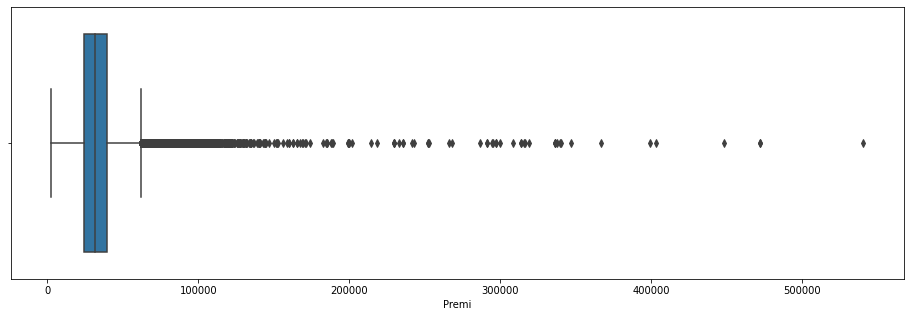

In [49]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
sn.boxplot(df_train['Premi'])
plt.show()

In [50]:
# Proses IQR
Q1 = np.percentile(df_train['Premi'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(df_train['Premi'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df_train['Premi'], 75, interpolation = 'midpoint')
print("Kuartil 1: ", Q1,"Kuartil 2: ", Q2,"Kuartil 3: ", Q3)

IQR = Q3 - Q1 
print("Hasil IQR: ", IQR)

Kuartil 1:  24376.0 Kuartil 2:  31607.0 Kuartil 3:  39328.0
Hasil IQR:  14952.0


In [51]:
# Data Trimming
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('Batas bawah: ', low_lim)
print('Batas atas: ', up_lim)

Batas bawah:  1948.0
Batas atas:  61756.0


In [52]:
df_train[df_train['Premi'] > up_lim]
df_train[df_train['Premi'] < low_lim]

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik


In [53]:
# Menghitung banyak data setelah menghapus outlier
data = df_train[df_train['Premi'] < up_lim]
print("Shape data concat: ", data.shape)

Shape data concat:  (166345, 11)


In [54]:
new_df_cap = data.copy()
new_df_cap['Premi'] = np.where(
    new_df_cap['Premi'] > up_lim,
    up_lim,
    np.where(
        new_df_cap['Premi'] < low_lim,
        low_lim,
        new_df_cap['Premi']
    )
)

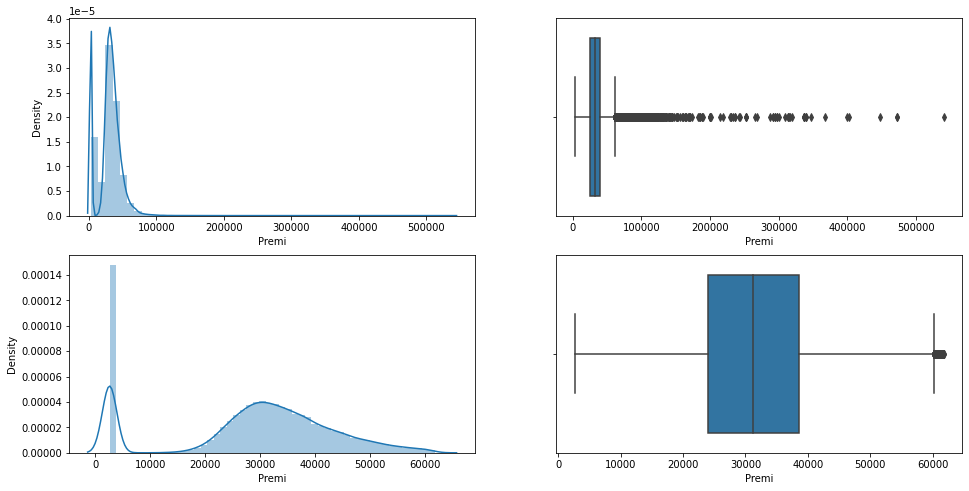

In [55]:
# Perbandingan kolom Premi sebelum dan sesudah trimming outlier 
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sn.distplot(df_train['Premi'])
plt.subplot(2,2,2)
sn.boxplot(df_train['Premi'])
plt.subplot(2,2,3)
sn.distplot(data['Premi'])
plt.subplot(2,2,4)
sn.boxplot(data['Premi'])
plt.show()

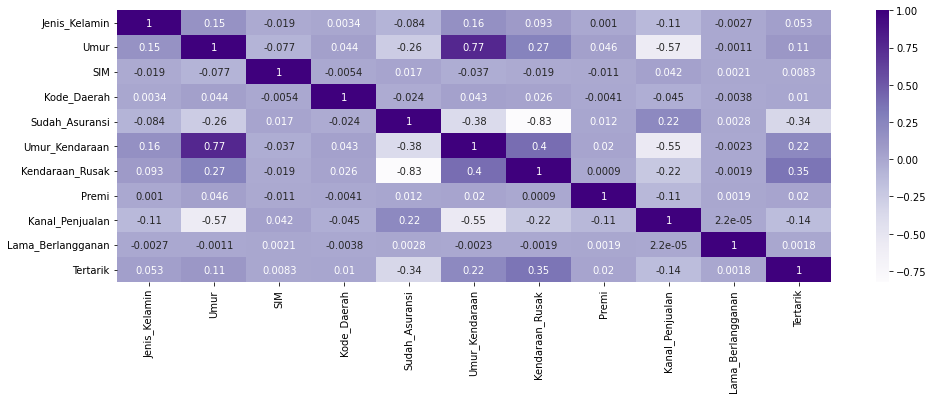

In [56]:
# Korelasi antar kolom
corr_train = data.corr()
plt.figure(figsize = (16,5))
heatmap_train = sn.heatmap(corr_train, annot=True, cmap="Purples")
plt.show()

In [57]:
# Normalisasi data dengan minmax scaler
norm_data_train = (data - data.min()) / (data.max() - data.min())
norm_data_train.head(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.0,0.153846,1.0,0.634615,1.0,0.0,0.0,0.429632,0.932099,0.301038,0.0
1,1.0,0.430769,1.0,0.750000,0.0,1.0,1.0,0.391928,0.172840,0.512111,0.0
3,0.0,0.584615,1.0,0.923077,0.0,0.5,0.0,0.000000,0.759259,0.183391,0.0
5,1.0,0.015385,1.0,0.673077,1.0,0.0,0.0,0.340083,0.932099,0.557093,0.0
8,0.0,0.000000,1.0,0.153846,1.0,0.0,0.0,0.476268,0.981481,0.072664,0.0


In [58]:
norm_data_train.corr()['Tertarik'].sort_values()
#Independent Features: "Kendaraan_Rusak" & "Umur_Kendaraan"
#Dependent Feature: "Tertarik"

Sudah_Asuransi      -0.340709
Kanal_Penjualan     -0.139136
Lama_Berlangganan    0.001808
SIM                  0.008333
Kode_Daerah          0.010481
Premi                0.019592
Jenis_Kelamin        0.053497
Umur                 0.108777
Umur_Kendaraan       0.220512
Kendaraan_Rusak      0.353415
Tertarik             1.000000
Name: Tertarik, dtype: float64

0    146215
1     20130
Name: Tertarik, dtype: int64


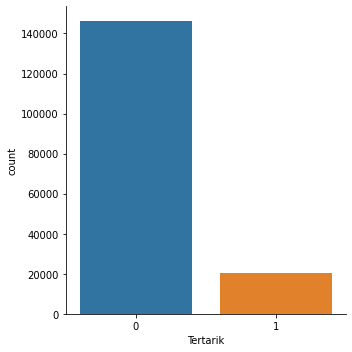

In [59]:
print(data['Tertarik'].value_counts())
sn.catplot(x = 'Tertarik', data=data, kind = 'count')

In [60]:
# SMOTE untuk imbalance data pada kolom tertarik
x_data = data.drop("Tertarik", axis=1)
y_data = data["Tertarik"]

smote = SMOTE()
x_data, y_data = smote.fit_resample(x_data, y_data)

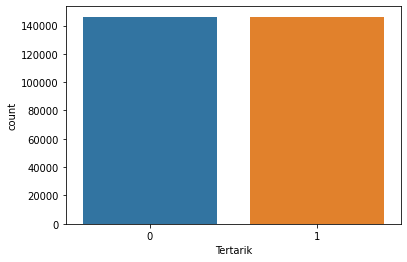

In [61]:
sn.countplot(y_data)

# Data Splitting

In [62]:
# Data Splitting 30%
train_size = int(0.70 * data.shape[0])
test_size = int(0.30 * data_test.shape[0])
print("Training set size : "  + str(train_size))
print("Testing set size : " + str(test_size))

Training set size : 116441
Testing set size : 14291


In [63]:
# Feature Selection pada kolom umur kendaraan, kendaraan rusak, dan tertarik
data = data.sample(frac = 1)
X = data.iloc[:, [6, 7]].values
y = data.iloc[:, 10].values
X = X.astype(float)

In [64]:
data_test = data_test.sample(frac = 1)
X_test = data_test.iloc[:, [6, 7]].values
y_test = data_test.iloc[:, 10].values
X_test = X_test.astype(float)

In [65]:
x_train = X[0:train_size, :]
y_train = y[0:train_size]

In [66]:
x_test = X_test[0:test_size, :]
y_test = y_test[0:test_size]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Training set')

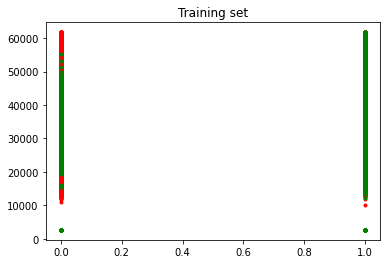

In [68]:
x_set, y_set = x_train, y_train
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j,marker='.')
plt.title('Training set')

# Modelling

In [69]:
class naiveBayes():
  def __init__(self):
    self.dictData = {}
  
  def fit (self, trainX, trainY):
    def generateData (dictData, trainX, trainY):
      one = True
      zero = True
      for i in range (trainY.shape[0]):
        tempX = trainX[i,:].reshape(trainX[i,:].shape[0],1)
        if trainY[i] == 1:
          if one == True:
            dictData[1] = tempX
            one = False
          else:
            dictData[1] = np.append(dictData[1], tempX, axis = 1)

        elif trainY[i] == 0:
          if zero == True:
            dictData[0] = tempX
            zero = False
          else:
            dictData[0] = np.append(dictData[0], tempX, axis = 1)
      return dictData

    self.trainX = trainX
    self.trainY = trainY
    self.dictData[0] = np.array([[]])
    self.dictData[1] = np.array([[]])
    self.dictData = generateData (self.dictData, self.trainX, self.trainY)
    self.dictData[0] = self.dictData[0].T
    self.dictData[1] = self.dictData[1].T
    self.mean1 = np.mean(self.dictData[0], axis = 0)
    self.mean2 = np.mean(self.dictData[1], axis = 0)
    self.std1 = np.std(self.dictData[0], axis = 0)
    self.std2 = np.std(self.dictData[1], axis = 0)

  def prediksi (self, testX):
    def posterior (x, trainXclass, mean, std):
      def probability (x, mean, sigma):
        return np.exp(- (x - mean) ** 2 / (2 * sigma ** 2)) * (1 / (np.sqrt (2 * np.pi) * sigma))

      prd = np.prod(probability(x, mean, std), axis = 1)
      prd = prd * (trainXclass.shape[0] / self.trainX.shape[0])
      return prd

    p2 = posterior(testX, self.dictData[1], self.mean2, self.std2)
    p1 = posterior(testX, self.dictData[0], self.mean1, self.std1)
    return 1 * (p2 > p1)

# Evaluasi

In [70]:
trainX = x_train
trainY = y_train
testX = x_test
testY = y_test

nb = naiveBayes()
nb.fit(trainX, trainY)
predictY = nb.prediksi(testX)

confMatrix = confusion_matrix(testY, predictY)
print("Accuracy   :", acc(y_test, predictY))

Accuracy   : 0.8389195997480932


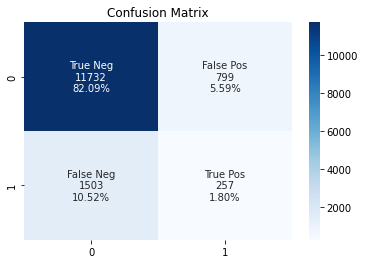

In [71]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confMatrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confMatrix.flatten()/np.sum(confMatrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.title('Confusion Matrix')
sn.heatmap(confMatrix, annot=labels, fmt='', cmap='Blues')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


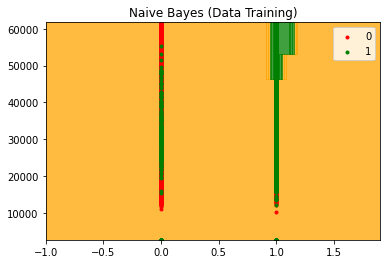

In [72]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
setX, setY = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = setX[:, 0].min() - 1, stop = setX[:, 0].max() + 1, step = 0.1),
                     np.arange(start = setX[:, 1].min() - 1, stop = setX[:, 1].max() + 1, step = 0.1))
plt.contourf(X1, X2, nb.prediksi(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(setY)):
    plt.scatter(setX[setY == j, 0], setX[setY == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j,marker='.')
plt.title('Naive Bayes (Data Training)')
plt.legend()
plt.show()

# Eksplorasi


In [73]:
# Klasifikasi dengan algortima Decision Tree
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
decision_tree = decision_tree.fit(x_train, y_train)
result_decision_tree = decision_tree.predict(x_test)

print('Decision Tree Score Result')
print("Accuracy   :",acc(y_test, result_decision_tree))

Decision Tree Score Result
Accuracy   : 0.8767755930305787


In [74]:
# Klasifikasi dengan algoritma KNN
knn = KNeighborsClassifier(n_neighbors = 4)
knn = knn.fit(x_train, y_train)
result_knn = knn.predict(x_test)

print('KNN Score Result')
print("Accuracy   :", acc(y_test, result_knn))

KNN Score Result
Accuracy   : 0.8708977678259044


# Kesimpulan

Dari hasil pemodelan dan eksplorasi yang telah dilakukan didapat bahwa model klasifikasi dengan algoritma Decision Tree lebih baik dari pada Naive Bayes dan KNN, yaitu dengan skor akurasi sebesar 0.878
 

# Referensi

Data Splitting: https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

Smote: https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

Confusion Matrix Visualization: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
